# Trainer() usage
2020.10.05

Test the trainer() method on 'Attack Comments' data and 2400 hand labeled 'Anti-Asian' data.

Student: Xuanyu Su                                                                 
Supervisor: Isar Nejadgholi

In [1]:
from transformers import BertForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [2]:
import pandas as pd
train_data = pd.read_csv('Data/Train_comment.csv',sep=',',encoding = "ISO-8859-1")
test_data = pd.read_csv('Data/Test_comment.csv',sep=',',encoding = "ISO-8859-1")
val_data = pd.read_csv('Data/Val_comment.csv',sep=',',encoding = "ISO-8859-1")

In [3]:
def transfer_to_int(temp):
    temp2 = []
    for i in temp:
        if i == 1.0:
            temp2.append(1)
        else:
            temp2.append(0)
    return temp2
        
train_data['attack'] = transfer_to_int(train_data['attack'])
test_data['attack'] = transfer_to_int(test_data['attack'])
val_data['attack'] = transfer_to_int(val_data['attack'])

In [4]:
train_data.head()

,comment,attack
0,newline tokenthis is not creative those are ...,0
1,newline tokennewline token the term standard ...,0
2,newline tokennewline tokentrue or false the si...,0
3,this page will need disambiguation,0
4,newline token newline tokennewline tokenimport...,0


In [5]:
ap=train_data.groupby(by=['attack'])
ap.size()

attack
0    61447
1     8079
dtype: int64

In [6]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [40]:
test_data2400 = pd.read_csv('Data/test5.csv',sep=',',encoding = "ISO-8859-1")

In [41]:
len(test_data2400)

2319

In [42]:
test_data2400['attack'] = [int(i) for i in test_data2400['attack']]

In [43]:
test_data2400.head()

,comment,attack
0,fucking piece of shit your whole community is...,1
1,im not being funny but coronavirus in china ir...,0
2,got on the victoria line today to seven sister...,1
3,it s appalling that the media amp libtards bit...,1
4,dude fuck the chinese man fuck em and if you t...,1


In [44]:
test_data2400_texts = list(test_data2400['comment'])
test_data2400_labels = list(test_data2400['attack'])
test_data2400_encodings = tokenizer(test_data2400_texts, truncation=True, padding=True)
test_data2400_dataset = LoadDataset(test_data2400_encodings, test_data2400_labels)

In [46]:
len(test_data2400_dataset)

2319

In [7]:
train_texts = list(train_data['comment'])
test_texts = list(test_data['comment'])
val_texts = list(val_data['comment'])

In [8]:
train_labels = list(train_data['attack'])
test_labels = list(test_data['attack'])
val_labels = list(val_data['attack'])

In [9]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)


In [10]:
import torch

class LoadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = LoadDataset(train_encodings, train_labels)
val_dataset = LoadDataset(val_encodings, val_labels)
test_dataset = LoadDataset(test_encodings, test_labels)

In [11]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [12]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs2',            # directory for storing logs
    logging_steps=10,
)



trainer = Trainer(
    model=model,                         
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset           
)

trainer.train()

{'loss': 0.7024322986602783, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.0011506155793349442, 'step': 10}
{'loss': 0.6726636409759521, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.0023012311586698884, 'step': 20}
{'loss': 0.6476823806762695, 'learning_rate': 3e-06, 'epoch': 0.0034518467380048328, 'step': 30}
{'loss': 0.5887763977050782, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.004602462317339777, 'step': 40}
{'loss': 0.5375461578369141, 'learning_rate': 5e-06, 'epoch': 0.005753077896674721, 'step': 50}
{'loss': 0.4764442443847656, 'learning_rate': 6e-06, 'epoch': 0.0069036934760096655, 'step': 60}
{'loss': 0.3956455230712891, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.00805430905534461, 'step': 70}
{'loss': 0.3333026885986328, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.009204924634679553, 'step': 80}
{'loss': 0.4207569122314453, 'learning_rate': 9e-06, 'epoch': 0.010355540214014497, 'step': 90}
{'loss': 0.3247215270996094, 'learning_rate': 1e-05

F:\conda\lib\site-packages\torch\optim\lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


{'loss': 0.27597198486328123, 'learning_rate': 4.998835991153533e-05, 'epoch': 0.058681394546082156, 'step': 510}
{'loss': 0.20503997802734375, 'learning_rate': 4.9976719823070654e-05, 'epoch': 0.0598320101254171, 'step': 520}
{'loss': 0.38364410400390625, 'learning_rate': 4.996507973460598e-05, 'epoch': 0.06098262570475204, 'step': 530}
{'loss': 0.30197601318359374, 'learning_rate': 4.995343964614131e-05, 'epoch': 0.06213324128408699, 'step': 540}
{'loss': 0.1218536376953125, 'learning_rate': 4.994179955767664e-05, 'epoch': 0.06328385686342193, 'step': 550}
{'loss': 0.0950714111328125, 'learning_rate': 4.993015946921197e-05, 'epoch': 0.06443447244275688, 'step': 560}
{'loss': 0.3160675048828125, 'learning_rate': 4.99185193807473e-05, 'epoch': 0.06558508802209181, 'step': 570}
{'loss': 0.32928924560546874, 'learning_rate': 4.990687929228262e-05, 'epoch': 0.06673570360142676, 'step': 580}
{'loss': 0.17274169921875, 'learning_rate': 4.989523920381795e-05, 'epoch': 0.06788631918076171, 's

{'loss': 0.156439208984375, 'learning_rate': 4.9126993365149574e-05, 'epoch': 0.14382694741686802, 'step': 1250}
{'loss': 0.11634521484375, 'learning_rate': 4.9115353276684903e-05, 'epoch': 0.14497756299620296, 'step': 1260}
{'loss': 0.2225250244140625, 'learning_rate': 4.910371318822023e-05, 'epoch': 0.14612817857553792, 'step': 1270}
{'loss': 0.29849853515625, 'learning_rate': 4.909207309975556e-05, 'epoch': 0.14727879415487286, 'step': 1280}
{'loss': 0.38763427734375, 'learning_rate': 4.908043301129089e-05, 'epoch': 0.1484294097342078, 'step': 1290}
{'loss': 0.1535247802734375, 'learning_rate': 4.906879292282622e-05, 'epoch': 0.14958002531354275, 'step': 1300}
{'loss': 0.3398223876953125, 'learning_rate': 4.905715283436154e-05, 'epoch': 0.1507306408928777, 'step': 1310}
{'loss': 0.16019287109375, 'learning_rate': 4.904551274589687e-05, 'epoch': 0.15188125647221262, 'step': 1320}
{'loss': 0.2488983154296875, 'learning_rate': 4.90338726574322e-05, 'epoch': 0.15303187205154758, 'step':

{'loss': 0.38072509765625, 'learning_rate': 4.8265626818763824e-05, 'epoch': 0.2289725002876539, 'step': 1990}
{'loss': 0.118206787109375, 'learning_rate': 4.825398673029915e-05, 'epoch': 0.23012311586698883, 'step': 2000}
{'loss': 0.1325958251953125, 'learning_rate': 4.824234664183448e-05, 'epoch': 0.2312737314463238, 'step': 2010}
{'loss': 0.1375030517578125, 'learning_rate': 4.823070655336981e-05, 'epoch': 0.23242434702565873, 'step': 2020}
{'loss': 0.162091064453125, 'learning_rate': 4.821906646490514e-05, 'epoch': 0.23357496260499366, 'step': 2030}
{'loss': 0.2165985107421875, 'learning_rate': 4.820742637644046e-05, 'epoch': 0.23472557818432863, 'step': 2040}
{'loss': 0.19173583984375, 'learning_rate': 4.819578628797579e-05, 'epoch': 0.23587619376366356, 'step': 2050}
{'loss': 0.1461944580078125, 'learning_rate': 4.818414619951112e-05, 'epoch': 0.2370268093429985, 'step': 2060}
{'loss': 0.2949493408203125, 'learning_rate': 4.817250611104644e-05, 'epoch': 0.23817742492233346, 'step

{'loss': 0.26226806640625, 'learning_rate': 4.740426027237807e-05, 'epoch': 0.31411805315843977, 'step': 2730}
{'loss': 0.28819580078125, 'learning_rate': 4.73926201839134e-05, 'epoch': 0.3152686687377747, 'step': 2740}
{'loss': 0.223419189453125, 'learning_rate': 4.738098009544873e-05, 'epoch': 0.31641928431710964, 'step': 2750}
{'loss': 0.320281982421875, 'learning_rate': 4.7369340006984054e-05, 'epoch': 0.3175698998964446, 'step': 2760}
{'loss': 0.227301025390625, 'learning_rate': 4.735769991851938e-05, 'epoch': 0.31872051547577956, 'step': 2770}
{'loss': 0.131622314453125, 'learning_rate': 4.734605983005471e-05, 'epoch': 0.3198711310551145, 'step': 2780}
{'loss': 0.111566162109375, 'learning_rate': 4.7334419741590035e-05, 'epoch': 0.32102174663444943, 'step': 2790}
{'loss': 0.0747802734375, 'learning_rate': 4.7322779653125364e-05, 'epoch': 0.32217236221378437, 'step': 2800}
{'loss': 0.247955322265625, 'learning_rate': 4.731113956466069e-05, 'epoch': 0.3233229777931193, 'step': 2810

{'loss': 0.231475830078125, 'learning_rate': 4.654289372599232e-05, 'epoch': 0.3992636060292256, 'step': 3470}
{'loss': 0.152264404296875, 'learning_rate': 4.653125363752765e-05, 'epoch': 0.4004142216085606, 'step': 3480}
{'loss': 0.260357666015625, 'learning_rate': 4.6519613549062975e-05, 'epoch': 0.40156483718789554, 'step': 3490}
{'loss': 0.24407958984375, 'learning_rate': 4.6507973460598304e-05, 'epoch': 0.4027154527672305, 'step': 3500}
{'loss': 0.1626953125, 'learning_rate': 4.649633337213363e-05, 'epoch': 0.4038660683465654, 'step': 3510}
{'loss': 0.32662353515625, 'learning_rate': 4.6484693283668955e-05, 'epoch': 0.40501668392590034, 'step': 3520}
{'loss': 0.2403564453125, 'learning_rate': 4.6473053195204284e-05, 'epoch': 0.4061672995052353, 'step': 3530}
{'loss': 0.08544921875, 'learning_rate': 4.646141310673961e-05, 'epoch': 0.40731791508457027, 'step': 3540}
{'loss': 0.27626953125, 'learning_rate': 4.644977301827494e-05, 'epoch': 0.4084685306639052, 'step': 3550}
{'loss': 0.

{'loss': 0.20765380859375, 'learning_rate': 4.5669887091141896e-05, 'epoch': 0.48555977447934645, 'step': 4220}
{'loss': 0.1169677734375, 'learning_rate': 4.5658247002677225e-05, 'epoch': 0.4867103900586814, 'step': 4230}
{'loss': 0.154913330078125, 'learning_rate': 4.5646606914212554e-05, 'epoch': 0.4878610056380163, 'step': 4240}
{'loss': 0.209381103515625, 'learning_rate': 4.5634966825747876e-05, 'epoch': 0.48901162121735126, 'step': 4250}
{'loss': 0.265765380859375, 'learning_rate': 4.5623326737283205e-05, 'epoch': 0.49016223679668625, 'step': 4260}
{'loss': 0.13046875, 'learning_rate': 4.5611686648818534e-05, 'epoch': 0.4913128523760212, 'step': 4270}
{'loss': 0.0896240234375, 'learning_rate': 4.5600046560353856e-05, 'epoch': 0.4924634679553561, 'step': 4280}
{'loss': 0.186480712890625, 'learning_rate': 4.558840647188919e-05, 'epoch': 0.49361408353469105, 'step': 4290}
{'loss': 0.151922607421875, 'learning_rate': 4.557676638342452e-05, 'epoch': 0.494764699114026, 'step': 4300}
{'l

{'loss': 0.13875732421875, 'learning_rate': 4.479688045629147e-05, 'epoch': 0.5718559429294673, 'step': 4970}
{'loss': 0.27615966796875, 'learning_rate': 4.47852403678268e-05, 'epoch': 0.5730065585088022, 'step': 4980}
{'loss': 0.10938720703125, 'learning_rate': 4.4773600279362126e-05, 'epoch': 0.5741571740881372, 'step': 4990}
{'loss': 0.19658203125, 'learning_rate': 4.476196019089745e-05, 'epoch': 0.5753077896674721, 'step': 5000}
{'loss': 0.18961181640625, 'learning_rate': 4.475032010243278e-05, 'epoch': 0.576458405246807, 'step': 5010}
{'loss': 0.2218505859375, 'learning_rate': 4.4738680013968106e-05, 'epoch': 0.577609020826142, 'step': 5020}
{'loss': 0.086328125, 'learning_rate': 4.4727039925503435e-05, 'epoch': 0.5787596364054769, 'step': 5030}
{'loss': 0.0536865234375, 'learning_rate': 4.4715399837038764e-05, 'epoch': 0.5799102519848118, 'step': 5040}
{'loss': 0.12222900390625, 'learning_rate': 4.470375974857409e-05, 'epoch': 0.5810608675641468, 'step': 5050}
{'loss': 0.09362792

{'loss': 0.21046142578125, 'learning_rate': 4.391223373297637e-05, 'epoch': 0.659302726958923, 'step': 5730}
{'loss': 0.19603271484375, 'learning_rate': 4.39005936445117e-05, 'epoch': 0.6604533425382579, 'step': 5740}
{'loss': 0.3601318359375, 'learning_rate': 4.388895355604703e-05, 'epoch': 0.6616039581175929, 'step': 5750}
{'loss': 0.17950439453125, 'learning_rate': 4.3877313467582356e-05, 'epoch': 0.6627545736969278, 'step': 5760}
{'loss': 0.33634033203125, 'learning_rate': 4.3865673379117685e-05, 'epoch': 0.6639051892762629, 'step': 5770}
{'loss': 0.1736572265625, 'learning_rate': 4.3854033290653014e-05, 'epoch': 0.6650558048555978, 'step': 5780}
{'loss': 0.08035888671875, 'learning_rate': 4.3842393202188336e-05, 'epoch': 0.6662064204349327, 'step': 5790}
{'loss': 0.18587646484375, 'learning_rate': 4.3830753113723665e-05, 'epoch': 0.6673570360142677, 'step': 5800}
{'loss': 0.13839111328125, 'learning_rate': 4.3819113025258994e-05, 'epoch': 0.6685076515936026, 'step': 5810}
{'loss':

{'loss': 0.13983154296875, 'learning_rate': 4.302758700966128e-05, 'epoch': 0.7467495109883788, 'step': 6490}
{'loss': 0.1797119140625, 'learning_rate': 4.3015946921196606e-05, 'epoch': 0.7479001265677138, 'step': 6500}
{'loss': 0.30042724609375, 'learning_rate': 4.3004306832731935e-05, 'epoch': 0.7490507421470487, 'step': 6510}
{'loss': 0.10892333984375, 'learning_rate': 4.299266674426726e-05, 'epoch': 0.7502013577263836, 'step': 6520}
{'loss': 0.1069091796875, 'learning_rate': 4.2981026655802586e-05, 'epoch': 0.7513519733057186, 'step': 6530}
{'loss': 0.1309814453125, 'learning_rate': 4.2969386567337915e-05, 'epoch': 0.7525025888850535, 'step': 6540}
{'loss': 0.21302490234375, 'learning_rate': 4.295774647887324e-05, 'epoch': 0.7536532044643884, 'step': 6550}
{'loss': 0.3987548828125, 'learning_rate': 4.2946106390408566e-05, 'epoch': 0.7548038200437234, 'step': 6560}
{'loss': 0.32584228515625, 'learning_rate': 4.2934466301943895e-05, 'epoch': 0.7559544356230583, 'step': 6570}
{'loss':

{'loss': 0.10775146484375, 'learning_rate': 4.215458037481085e-05, 'epoch': 0.8330456794384996, 'step': 7240}
{'loss': 0.383203125, 'learning_rate': 4.214294028634618e-05, 'epoch': 0.8341962950178345, 'step': 7250}
{'loss': 0.28016357421875, 'learning_rate': 4.213130019788151e-05, 'epoch': 0.8353469105971695, 'step': 7260}
{'loss': 0.0960693359375, 'learning_rate': 4.211966010941683e-05, 'epoch': 0.8364975261765044, 'step': 7270}
{'loss': 0.1116943359375, 'learning_rate': 4.210802002095216e-05, 'epoch': 0.8376481417558393, 'step': 7280}
{'loss': 0.2571044921875, 'learning_rate': 4.209637993248749e-05, 'epoch': 0.8387987573351743, 'step': 7290}
{'loss': 0.25760498046875, 'learning_rate': 4.2084739844022816e-05, 'epoch': 0.8399493729145092, 'step': 7300}
{'loss': 0.24395751953125, 'learning_rate': 4.2073099755558145e-05, 'epoch': 0.8410999884938442, 'step': 7310}
{'loss': 0.15299072265625, 'learning_rate': 4.2061459667093474e-05, 'epoch': 0.8422506040731792, 'step': 7320}
{'loss': 0.1375

{'loss': 0.12030029296875, 'learning_rate': 4.126993365149575e-05, 'epoch': 0.9204924634679553, 'step': 8000}
{'loss': 0.11055908203125, 'learning_rate': 4.125829356303108e-05, 'epoch': 0.9216430790472903, 'step': 8010}
{'loss': 0.20753173828125, 'learning_rate': 4.124665347456641e-05, 'epoch': 0.9227936946266252, 'step': 8020}
{'loss': 0.10850830078125, 'learning_rate': 4.123501338610174e-05, 'epoch': 0.9239443102059602, 'step': 8030}
{'loss': 0.08748779296875, 'learning_rate': 4.1223373297637066e-05, 'epoch': 0.9250949257852952, 'step': 8040}
{'loss': 0.28466796875, 'learning_rate': 4.1211733209172395e-05, 'epoch': 0.9262455413646301, 'step': 8050}
{'loss': 0.21761474609375, 'learning_rate': 4.120009312070772e-05, 'epoch': 0.927396156943965, 'step': 8060}
{'loss': 0.2751708984375, 'learning_rate': 4.1188453032243046e-05, 'epoch': 0.9285467725233, 'step': 8070}
{'loss': 0.23740234375, 'learning_rate': 4.1176812943778375e-05, 'epoch': 0.9296973881026349, 'step': 8080}
{'loss': 0.088964

{'loss': 0.145751953125, 'learning_rate': 4.045512745896869e-05, 'epoch': 1.0010355540214015, 'step': 8700}
{'loss': 0.277734375, 'learning_rate': 4.044348737050402e-05, 'epoch': 1.0021861696007364, 'step': 8710}
{'loss': 0.2168212890625, 'learning_rate': 4.043184728203935e-05, 'epoch': 1.0033367851800714, 'step': 8720}
{'loss': 0.16214599609375, 'learning_rate': 4.042020719357467e-05, 'epoch': 1.0044874007594062, 'step': 8730}
{'loss': 0.1621826171875, 'learning_rate': 4.040856710511e-05, 'epoch': 1.0056380163387413, 'step': 8740}
{'loss': 0.29495849609375, 'learning_rate': 4.039692701664533e-05, 'epoch': 1.006788631918076, 'step': 8750}
{'loss': 0.06365966796875, 'learning_rate': 4.038528692818065e-05, 'epoch': 1.0079392474974112, 'step': 8760}
{'loss': 0.15540771484375, 'learning_rate': 4.037364683971599e-05, 'epoch': 1.009089863076746, 'step': 8770}
{'loss': 0.21177978515625, 'learning_rate': 4.0362006751251316e-05, 'epoch': 1.010240478656081, 'step': 8780}
{'loss': 0.289892578125,

{'loss': 0.0093994140625, 'learning_rate': 3.957048073565359e-05, 'epoch': 1.0884823380508573, 'step': 9460}
{'loss': 0.24259033203125, 'learning_rate': 3.955884064718892e-05, 'epoch': 1.089632953630192, 'step': 9470}
{'loss': 0.1594970703125, 'learning_rate': 3.954720055872424e-05, 'epoch': 1.0907835692095271, 'step': 9480}
{'loss': 0.088818359375, 'learning_rate': 3.953556047025957e-05, 'epoch': 1.091934184788862, 'step': 9490}
{'loss': 0.1712890625, 'learning_rate': 3.95239203817949e-05, 'epoch': 1.093084800368197, 'step': 9500}
{'loss': 0.1506103515625, 'learning_rate': 3.951228029333024e-05, 'epoch': 1.0942354159475318, 'step': 9510}
{'loss': 0.13555908203125, 'learning_rate': 3.950064020486556e-05, 'epoch': 1.0953860315268669, 'step': 9520}
{'loss': 0.251611328125, 'learning_rate': 3.948900011640089e-05, 'epoch': 1.096536647106202, 'step': 9530}
{'loss': 0.09342041015625, 'learning_rate': 3.947736002793622e-05, 'epoch': 1.0976872626855367, 'step': 9540}
{'loss': 0.3055908203125, 

{'loss': 0.18455810546875, 'learning_rate': 3.8697474100803164e-05, 'epoch': 1.174778506500978, 'step': 10210}
{'loss': 0.32589111328125, 'learning_rate': 3.868583401233849e-05, 'epoch': 1.175929122080313, 'step': 10220}
{'loss': 0.21273193359375, 'learning_rate': 3.867419392387382e-05, 'epoch': 1.177079737659648, 'step': 10230}
{'loss': 0.09423828125, 'learning_rate': 3.866255383540915e-05, 'epoch': 1.1782303532389828, 'step': 10240}
{'loss': 0.0638916015625, 'learning_rate': 3.865091374694448e-05, 'epoch': 1.1793809688183179, 'step': 10250}
{'loss': 0.21810302734375, 'learning_rate': 3.863927365847981e-05, 'epoch': 1.1805315843976527, 'step': 10260}
{'loss': 0.07105712890625, 'learning_rate': 3.862763357001513e-05, 'epoch': 1.1816821999769878, 'step': 10270}
{'loss': 0.08670654296875, 'learning_rate': 3.861599348155046e-05, 'epoch': 1.1828328155563226, 'step': 10280}
{'loss': 0.0896240234375, 'learning_rate': 3.860435339308579e-05, 'epoch': 1.1839834311356576, 'step': 10290}
{'loss':

{'loss': 0.2969482421875, 'learning_rate': 3.781282737748807e-05, 'epoch': 1.2622252905304339, 'step': 10970}
{'loss': 0.122705078125, 'learning_rate': 3.78011872890234e-05, 'epoch': 1.2633759061097687, 'step': 10980}
{'loss': 0.011474609375, 'learning_rate': 3.778954720055873e-05, 'epoch': 1.2645265216891037, 'step': 10990}
{'loss': 0.0906005859375, 'learning_rate': 3.777790711209405e-05, 'epoch': 1.2656771372684386, 'step': 11000}
{'loss': 0.257373046875, 'learning_rate': 3.776626702362938e-05, 'epoch': 1.2668277528477736, 'step': 11010}
{'loss': 0.223876953125, 'learning_rate': 3.775462693516471e-05, 'epoch': 1.2679783684271084, 'step': 11020}
{'loss': 0.3193359375, 'learning_rate': 3.774298684670003e-05, 'epoch': 1.2691289840064435, 'step': 11030}
{'loss': 0.28330078125, 'learning_rate': 3.773134675823536e-05, 'epoch': 1.2702795995857783, 'step': 11040}
{'loss': 0.2043212890625, 'learning_rate': 3.77197066697707e-05, 'epoch': 1.2714302151651133, 'step': 11050}
{'loss': 0.2529296875

{'loss': 0.151220703125, 'learning_rate': 3.692818065417297e-05, 'epoch': 1.3496720745598896, 'step': 11730}
{'loss': 0.179541015625, 'learning_rate': 3.69165405657083e-05, 'epoch': 1.3508226901392244, 'step': 11740}
{'loss': 0.2967529296875, 'learning_rate': 3.690490047724363e-05, 'epoch': 1.3519733057185594, 'step': 11750}
{'loss': 0.0680419921875, 'learning_rate': 3.689326038877895e-05, 'epoch': 1.3531239212978945, 'step': 11760}
{'loss': 0.160205078125, 'learning_rate': 3.688162030031428e-05, 'epoch': 1.3542745368772293, 'step': 11770}
{'loss': 0.242138671875, 'learning_rate': 3.686998021184961e-05, 'epoch': 1.3554251524565641, 'step': 11780}
{'loss': 0.1377197265625, 'learning_rate': 3.685834012338494e-05, 'epoch': 1.3565757680358992, 'step': 11790}
{'loss': 0.0714599609375, 'learning_rate': 3.684670003492027e-05, 'epoch': 1.3577263836152342, 'step': 11800}
{'loss': 0.090087890625, 'learning_rate': 3.68350599464556e-05, 'epoch': 1.358876999194569, 'step': 11810}
{'loss': 0.2149902

{'loss': 0.0455078125, 'learning_rate': 3.6043533930857874e-05, 'epoch': 1.4371188585893453, 'step': 12490}
{'loss': 0.19228515625, 'learning_rate': 3.60318938423932e-05, 'epoch': 1.4382694741686803, 'step': 12500}
{'loss': 0.1031982421875, 'learning_rate': 3.602025375392853e-05, 'epoch': 1.4394200897480152, 'step': 12510}
{'loss': 0.285009765625, 'learning_rate': 3.600861366546386e-05, 'epoch': 1.4405707053273502, 'step': 12520}
{'loss': 0.077685546875, 'learning_rate': 3.599697357699919e-05, 'epoch': 1.441721320906685, 'step': 12530}
{'loss': 0.0409912109375, 'learning_rate': 3.598533348853452e-05, 'epoch': 1.44287193648602, 'step': 12540}
{'loss': 0.24853515625, 'learning_rate': 3.597369340006984e-05, 'epoch': 1.444022552065355, 'step': 12550}
{'loss': 0.0829833984375, 'learning_rate': 3.596205331160517e-05, 'epoch': 1.44517316764469, 'step': 12560}
{'loss': 0.30400390625, 'learning_rate': 3.59504132231405e-05, 'epoch': 1.4463237832240248, 'step': 12570}
{'loss': 0.138427734375, 'le

{'loss': 0.1113037109375, 'learning_rate': 3.515888720754278e-05, 'epoch': 1.524565642618801, 'step': 13250}
{'loss': 0.1569580078125, 'learning_rate': 3.514724711907811e-05, 'epoch': 1.525716258198136, 'step': 13260}
{'loss': 0.2219970703125, 'learning_rate': 3.513560703061343e-05, 'epoch': 1.5268668737774709, 'step': 13270}
{'loss': 0.14150390625, 'learning_rate': 3.512396694214876e-05, 'epoch': 1.528017489356806, 'step': 13280}
{'loss': 0.0726806640625, 'learning_rate': 3.511232685368409e-05, 'epoch': 1.529168104936141, 'step': 13290}
{'loss': 0.1059814453125, 'learning_rate': 3.510068676521941e-05, 'epoch': 1.5303187205154758, 'step': 13300}
{'loss': 0.059619140625, 'learning_rate': 3.508904667675474e-05, 'epoch': 1.5314693360948106, 'step': 13310}
{'loss': 0.27021484375, 'learning_rate': 3.507740658829007e-05, 'epoch': 1.5326199516741457, 'step': 13320}
{'loss': 0.1111083984375, 'learning_rate': 3.50657664998254e-05, 'epoch': 1.5337705672534807, 'step': 13330}
{'loss': 0.336328125

{'loss': 0.230615234375, 'learning_rate': 3.427424048422768e-05, 'epoch': 1.6120124266482567, 'step': 14010}
{'loss': 0.1308349609375, 'learning_rate': 3.426260039576301e-05, 'epoch': 1.6131630422275918, 'step': 14020}
{'loss': 0.1297119140625, 'learning_rate': 3.4250960307298334e-05, 'epoch': 1.6143136578069268, 'step': 14030}
{'loss': 0.07841796875, 'learning_rate': 3.423932021883366e-05, 'epoch': 1.6154642733862616, 'step': 14040}
{'loss': 0.221044921875, 'learning_rate': 3.422768013036899e-05, 'epoch': 1.6166148889655965, 'step': 14050}
{'loss': 0.3359619140625, 'learning_rate': 3.421604004190432e-05, 'epoch': 1.6177655045449315, 'step': 14060}
{'loss': 0.0729248046875, 'learning_rate': 3.420439995343965e-05, 'epoch': 1.6189161201242666, 'step': 14070}
{'loss': 0.141259765625, 'learning_rate': 3.419275986497498e-05, 'epoch': 1.6200667357036014, 'step': 14080}
{'loss': 0.22431640625, 'learning_rate': 3.41811197765103e-05, 'epoch': 1.6212173512829364, 'step': 14090}
{'loss': 0.149389

{'loss': 0.214794921875, 'learning_rate': 3.3401233849377255e-05, 'epoch': 1.6983085950983776, 'step': 14760}
{'loss': 0.0590087890625, 'learning_rate': 3.3389593760912584e-05, 'epoch': 1.6994592106777127, 'step': 14770}
{'loss': 0.1512939453125, 'learning_rate': 3.337795367244791e-05, 'epoch': 1.7006098262570475, 'step': 14780}
{'loss': 0.114892578125, 'learning_rate': 3.336631358398324e-05, 'epoch': 1.7017604418363823, 'step': 14790}
{'loss': 0.0999755859375, 'learning_rate': 3.335467349551857e-05, 'epoch': 1.7029110574157174, 'step': 14800}
{'loss': 0.1649169921875, 'learning_rate': 3.33430334070539e-05, 'epoch': 1.7040616729950524, 'step': 14810}
{'loss': 0.087939453125, 'learning_rate': 3.333139331858922e-05, 'epoch': 1.7052122885743874, 'step': 14820}
{'loss': 0.2093994140625, 'learning_rate': 3.331975323012455e-05, 'epoch': 1.7063629041537223, 'step': 14830}
{'loss': 0.18662109375, 'learning_rate': 3.330811314165988e-05, 'epoch': 1.707513519733057, 'step': 14840}
{'loss': 0.0482

{'loss': 0.0757080078125, 'learning_rate': 3.252822721452683e-05, 'epoch': 1.7846047635484985, 'step': 15510}
{'loss': 0.103076171875, 'learning_rate': 3.2516587126062156e-05, 'epoch': 1.7857553791278336, 'step': 15520}
{'loss': 0.0948974609375, 'learning_rate': 3.250494703759749e-05, 'epoch': 1.7869059947071684, 'step': 15530}
{'loss': 0.1833740234375, 'learning_rate': 3.2493306949132814e-05, 'epoch': 1.7880566102865032, 'step': 15540}
{'loss': 0.207568359375, 'learning_rate': 3.248166686066814e-05, 'epoch': 1.7892072258658382, 'step': 15550}
{'loss': 0.2149169921875, 'learning_rate': 3.247002677220347e-05, 'epoch': 1.7903578414451733, 'step': 15560}
{'loss': 0.2608154296875, 'learning_rate': 3.24583866837388e-05, 'epoch': 1.7915084570245081, 'step': 15570}
{'loss': 0.15078125, 'learning_rate': 3.244674659527412e-05, 'epoch': 1.792659072603843, 'step': 15580}
{'loss': 0.0089111328125, 'learning_rate': 3.243510650680945e-05, 'epoch': 1.793809688183178, 'step': 15590}
{'loss': 0.1232177

{'loss': 0.2094482421875, 'learning_rate': 3.1643580491211735e-05, 'epoch': 1.8720515475779542, 'step': 16270}
{'loss': 0.2151611328125, 'learning_rate': 3.1631940402747064e-05, 'epoch': 1.873202163157289, 'step': 16280}
{'loss': 0.136376953125, 'learning_rate': 3.162030031428239e-05, 'epoch': 1.874352778736624, 'step': 16290}
{'loss': 0.1622802734375, 'learning_rate': 3.1608660225817715e-05, 'epoch': 1.8755033943159591, 'step': 16300}
{'loss': 0.1272705078125, 'learning_rate': 3.1597020137353044e-05, 'epoch': 1.876654009895294, 'step': 16310}
{'loss': 0.2400390625, 'learning_rate': 3.158538004888837e-05, 'epoch': 1.8778046254746288, 'step': 16320}
{'loss': 0.056640625, 'learning_rate': 3.1573739960423695e-05, 'epoch': 1.8789552410539638, 'step': 16330}
{'loss': 0.08505859375, 'learning_rate': 3.156209987195903e-05, 'epoch': 1.8801058566332989, 'step': 16340}
{'loss': 0.121435546875, 'learning_rate': 3.155045978349436e-05, 'epoch': 1.881256472212634, 'step': 16350}
{'loss': 0.396337890

{'loss': 0.36435546875, 'learning_rate': 3.0758933767896636e-05, 'epoch': 1.95949833160741, 'step': 17030}
{'loss': 0.01875, 'learning_rate': 3.0747293679431965e-05, 'epoch': 1.960648947186745, 'step': 17040}
{'loss': 0.0543212890625, 'learning_rate': 3.0735653590967294e-05, 'epoch': 1.9617995627660798, 'step': 17050}
{'loss': 0.1654541015625, 'learning_rate': 3.0724013502502616e-05, 'epoch': 1.9629501783454146, 'step': 17060}
{'loss': 0.0599853515625, 'learning_rate': 3.0712373414037945e-05, 'epoch': 1.9641007939247497, 'step': 17070}
{'loss': 0.1112060546875, 'learning_rate': 3.070073332557328e-05, 'epoch': 1.9652514095040847, 'step': 17080}
{'loss': 0.0252685546875, 'learning_rate': 3.06890932371086e-05, 'epoch': 1.9664020250834198, 'step': 17090}
{'loss': 0.0712158203125, 'learning_rate': 3.067745314864393e-05, 'epoch': 1.9675526406627546, 'step': 17100}
{'loss': 0.227587890625, 'learning_rate': 3.066581306017926e-05, 'epoch': 1.9687032562420894, 'step': 17110}
{'loss': 0.194213867

{'loss': 0.010791015625, 'learning_rate': 3.0339890583168435e-05, 'epoch': 2.000920492463468, 'step': 17390}
{'loss': 0.050390625, 'learning_rate': 3.0328250494703764e-05, 'epoch': 2.002071108042803, 'step': 17400}
{'loss': 0.1430419921875, 'learning_rate': 3.0316610406239086e-05, 'epoch': 2.0032217236221377, 'step': 17410}
{'loss': 0.0695556640625, 'learning_rate': 3.030497031777442e-05, 'epoch': 2.0043723392014727, 'step': 17420}
{'loss': 0.10625, 'learning_rate': 3.0293330229309748e-05, 'epoch': 2.0055229547808078, 'step': 17430}
{'loss': 0.1431396484375, 'learning_rate': 3.028169014084507e-05, 'epoch': 2.006673570360143, 'step': 17440}
{'loss': 0.067529296875, 'learning_rate': 3.02700500523804e-05, 'epoch': 2.0078241859394774, 'step': 17450}
{'loss': 0.205517578125, 'learning_rate': 3.0258409963915728e-05, 'epoch': 2.0089748015188125, 'step': 17460}
{'loss': 0.2611572265625, 'learning_rate': 3.0246769875451053e-05, 'epoch': 2.0101254170981475, 'step': 17470}
{'loss': 0.069555664062

{'loss': 0.202392578125, 'learning_rate': 2.9455243859853336e-05, 'epoch': 2.0883672764929235, 'step': 18150}
{'loss': 0.19755859375, 'learning_rate': 2.9443603771388662e-05, 'epoch': 2.0895178920722586, 'step': 18160}
{'loss': 0.2018798828125, 'learning_rate': 2.943196368292399e-05, 'epoch': 2.0906685076515936, 'step': 18170}
{'loss': 0.168798828125, 'learning_rate': 2.942032359445932e-05, 'epoch': 2.0918191232309287, 'step': 18180}
{'loss': 0.088134765625, 'learning_rate': 2.940868350599465e-05, 'epoch': 2.0929697388102637, 'step': 18190}
{'loss': 0.150830078125, 'learning_rate': 2.9397043417529974e-05, 'epoch': 2.0941203543895983, 'step': 18200}
{'loss': 0.048681640625, 'learning_rate': 2.9385403329065303e-05, 'epoch': 2.0952709699689334, 'step': 18210}
{'loss': 0.052490234375, 'learning_rate': 2.9373763240600632e-05, 'epoch': 2.0964215855482684, 'step': 18220}
{'loss': 0.0359375, 'learning_rate': 2.9362123152135958e-05, 'epoch': 2.0975722011276035, 'step': 18230}
{'loss': 0.2412109

{'loss': 0.0981201171875, 'learning_rate': 2.857059713653824e-05, 'epoch': 2.1758140605223795, 'step': 18910}
{'loss': 0.007080078125, 'learning_rate': 2.8558957048073566e-05, 'epoch': 2.1769646761017145, 'step': 18920}
{'loss': 0.2488037109375, 'learning_rate': 2.8547316959608895e-05, 'epoch': 2.1781152916810496, 'step': 18930}
{'loss': 0.1780029296875, 'learning_rate': 2.8535676871144224e-05, 'epoch': 2.179265907260384, 'step': 18940}
{'loss': 0.082861328125, 'learning_rate': 2.8524036782679546e-05, 'epoch': 2.180416522839719, 'step': 18950}
{'loss': 0.0698974609375, 'learning_rate': 2.8512396694214875e-05, 'epoch': 2.1815671384190543, 'step': 18960}
{'loss': 0.0031494140625, 'learning_rate': 2.8500756605750208e-05, 'epoch': 2.1827177539983893, 'step': 18970}
{'loss': 0.2681396484375, 'learning_rate': 2.848911651728553e-05, 'epoch': 2.183868369577724, 'step': 18980}
{'loss': 0.043505859375, 'learning_rate': 2.847747642882086e-05, 'epoch': 2.185018985157059, 'step': 18990}
{'loss': 0.

{'loss': 0.2260498046875, 'learning_rate': 2.7697590501687816e-05, 'epoch': 2.2621102289725004, 'step': 19660}
{'loss': 0.0973388671875, 'learning_rate': 2.7685950413223145e-05, 'epoch': 2.2632608445518354, 'step': 19670}
{'loss': 0.2221923828125, 'learning_rate': 2.7674310324758467e-05, 'epoch': 2.26441146013117, 'step': 19680}
{'loss': 0.078466796875, 'learning_rate': 2.7662670236293796e-05, 'epoch': 2.265562075710505, 'step': 19690}
{'loss': 0.0142333984375, 'learning_rate': 2.7651030147829125e-05, 'epoch': 2.26671269128984, 'step': 19700}
{'loss': 0.1018310546875, 'learning_rate': 2.763939005936445e-05, 'epoch': 2.267863306869175, 'step': 19710}
{'loss': 0.1059326171875, 'learning_rate': 2.762774997089978e-05, 'epoch': 2.2690139224485097, 'step': 19720}
{'loss': 0.0411376953125, 'learning_rate': 2.761610988243511e-05, 'epoch': 2.270164538027845, 'step': 19730}
{'loss': 0.0154296875, 'learning_rate': 2.7604469793970434e-05, 'epoch': 2.27131515360718, 'step': 19740}
{'loss': 0.166625

{'loss': 0.1683349609375, 'learning_rate': 2.6812943778372717e-05, 'epoch': 2.349557013001956, 'step': 20420}
{'loss': 0.1114013671875, 'learning_rate': 2.6801303689908046e-05, 'epoch': 2.350707628581291, 'step': 20430}
{'loss': 0.0082275390625, 'learning_rate': 2.678966360144337e-05, 'epoch': 2.351858244160626, 'step': 20440}
{'loss': 0.20791015625, 'learning_rate': 2.67780235129787e-05, 'epoch': 2.353008859739961, 'step': 20450}
{'loss': 0.098095703125, 'learning_rate': 2.676638342451403e-05, 'epoch': 2.354159475319296, 'step': 20460}
{'loss': 0.1218994140625, 'learning_rate': 2.6754743336049355e-05, 'epoch': 2.3553100908986306, 'step': 20470}
{'loss': 0.2268310546875, 'learning_rate': 2.6743103247584684e-05, 'epoch': 2.3564607064779657, 'step': 20480}
{'loss': 0.0892333984375, 'learning_rate': 2.6731463159120013e-05, 'epoch': 2.3576113220573007, 'step': 20490}
{'loss': 0.08681640625, 'learning_rate': 2.6719823070655335e-05, 'epoch': 2.3587619376366358, 'step': 20500}
{'loss': 0.0424

{'loss': 0.129052734375, 'learning_rate': 2.592829705505762e-05, 'epoch': 2.437003797031412, 'step': 21180}
{'loss': 0.02412109375, 'learning_rate': 2.5916656966592944e-05, 'epoch': 2.438154412610747, 'step': 21190}
{'loss': 0.218505859375, 'learning_rate': 2.5905016878128273e-05, 'epoch': 2.439305028190082, 'step': 21200}
{'loss': 0.009423828125, 'learning_rate': 2.5893376789663605e-05, 'epoch': 2.4404556437694165, 'step': 21210}
{'loss': 0.202734375, 'learning_rate': 2.5881736701198934e-05, 'epoch': 2.4416062593487515, 'step': 21220}
{'loss': 0.2425048828125, 'learning_rate': 2.5870096612734256e-05, 'epoch': 2.4427568749280866, 'step': 21230}
{'loss': 0.1381103515625, 'learning_rate': 2.5858456524269585e-05, 'epoch': 2.4439074905074216, 'step': 21240}
{'loss': 0.0587890625, 'learning_rate': 2.5846816435804914e-05, 'epoch': 2.4450581060867562, 'step': 21250}
{'loss': 0.1531005859375, 'learning_rate': 2.583517634734024e-05, 'epoch': 2.4462087216660913, 'step': 21260}
{'loss': 0.0619140

{'loss': 0.2235107421875, 'learning_rate': 2.5043650331742523e-05, 'epoch': 2.5244505810608677, 'step': 21940}
{'loss': 0.2695068359375, 'learning_rate': 2.5032010243277848e-05, 'epoch': 2.5256011966402028, 'step': 21950}
{'loss': 0.0988037109375, 'learning_rate': 2.5020370154813177e-05, 'epoch': 2.5267518122195374, 'step': 21960}
{'loss': 0.028369140625, 'learning_rate': 2.5008730066348506e-05, 'epoch': 2.5279024277988724, 'step': 21970}
{'loss': 0.08125, 'learning_rate': 2.4997089977883835e-05, 'epoch': 2.5290530433782075, 'step': 21980}
{'loss': 0.07470703125, 'learning_rate': 2.498544988941916e-05, 'epoch': 2.530203658957542, 'step': 21990}
{'loss': 0.45478515625, 'learning_rate': 2.497380980095449e-05, 'epoch': 2.531354274536877, 'step': 22000}
{'loss': 0.1574951171875, 'learning_rate': 2.4962169712489815e-05, 'epoch': 2.532504890116212, 'step': 22010}
{'loss': 0.1577392578125, 'learning_rate': 2.4950529624025144e-05, 'epoch': 2.533655505695547, 'step': 22020}
{'loss': 0.131201171

{'loss': 0.0989013671875, 'learning_rate': 2.4159003608427424e-05, 'epoch': 2.611897365090323, 'step': 22700}
{'loss': 0.0822998046875, 'learning_rate': 2.4147363519962753e-05, 'epoch': 2.6130479806696583, 'step': 22710}
{'loss': 0.035107421875, 'learning_rate': 2.413572343149808e-05, 'epoch': 2.6141985962489933, 'step': 22720}
{'loss': 0.1578125, 'learning_rate': 2.4124083343033407e-05, 'epoch': 2.6153492118283284, 'step': 22730}
{'loss': 0.0816650390625, 'learning_rate': 2.4112443254568736e-05, 'epoch': 2.616499827407663, 'step': 22740}
{'loss': 0.184130859375, 'learning_rate': 2.4100803166104062e-05, 'epoch': 2.617650442986998, 'step': 22750}
{'loss': 0.0554931640625, 'learning_rate': 2.408916307763939e-05, 'epoch': 2.618801058566333, 'step': 22760}
{'loss': 0.0842529296875, 'learning_rate': 2.407752298917472e-05, 'epoch': 2.619951674145668, 'step': 22770}
{'loss': 0.2040771484375, 'learning_rate': 2.4065882900710045e-05, 'epoch': 2.6211022897250027, 'step': 22780}
{'loss': 0.129492

{'loss': 0.0818359375, 'learning_rate': 2.3274356885112328e-05, 'epoch': 2.699344149119779, 'step': 23460}
{'loss': 0.175341796875, 'learning_rate': 2.3262716796647654e-05, 'epoch': 2.7004947646991138, 'step': 23470}
{'loss': 0.1140380859375, 'learning_rate': 2.3251076708182983e-05, 'epoch': 2.701645380278449, 'step': 23480}
{'loss': 0.1268798828125, 'learning_rate': 2.323943661971831e-05, 'epoch': 2.702795995857784, 'step': 23490}
{'loss': 0.1348876953125, 'learning_rate': 2.322779653125364e-05, 'epoch': 2.703946611437119, 'step': 23500}
{'loss': 0.0091796875, 'learning_rate': 2.3216156442788966e-05, 'epoch': 2.705097227016454, 'step': 23510}
{'loss': 0.0578857421875, 'learning_rate': 2.3204516354324292e-05, 'epoch': 2.706247842595789, 'step': 23520}
{'loss': 0.1334716796875, 'learning_rate': 2.3192876265859624e-05, 'epoch': 2.7073984581751236, 'step': 23530}
{'loss': 0.172607421875, 'learning_rate': 2.318123617739495e-05, 'epoch': 2.7085490737544586, 'step': 23540}
{'loss': 0.1205566

{'loss': 0.007568359375, 'learning_rate': 2.2389710161797233e-05, 'epoch': 2.786790933149235, 'step': 24220}
{'loss': 0.0755859375, 'learning_rate': 2.2378070073332558e-05, 'epoch': 2.7879415487285697, 'step': 24230}
{'loss': 0.0490966796875, 'learning_rate': 2.2366429984867887e-05, 'epoch': 2.7890921643079047, 'step': 24240}
{'loss': 0.195068359375, 'learning_rate': 2.2354789896403213e-05, 'epoch': 2.79024277988724, 'step': 24250}
{'loss': 0.0025634765625, 'learning_rate': 2.234314980793854e-05, 'epoch': 2.7913933954665744, 'step': 24260}
{'loss': 0.1374755859375, 'learning_rate': 2.233150971947387e-05, 'epoch': 2.7925440110459094, 'step': 24270}
{'loss': 0.0705078125, 'learning_rate': 2.2319869631009196e-05, 'epoch': 2.7936946266252445, 'step': 24280}
{'loss': 0.0630615234375, 'learning_rate': 2.2308229542544522e-05, 'epoch': 2.7948452422045795, 'step': 24290}
{'loss': 0.1760498046875, 'learning_rate': 2.2296589454079854e-05, 'epoch': 2.7959958577839146, 'step': 24300}
{'loss': 0.253

{'loss': 0.1131103515625, 'learning_rate': 2.1505063438482134e-05, 'epoch': 2.8742377171786906, 'step': 24980}
{'loss': 0.1333251953125, 'learning_rate': 2.1493423350017463e-05, 'epoch': 2.8753883327580256, 'step': 24990}
{'loss': 0.0794921875, 'learning_rate': 2.1481783261552788e-05, 'epoch': 2.8765389483373607, 'step': 25000}
{'loss': 0.05341796875, 'learning_rate': 2.1470143173088117e-05, 'epoch': 2.8776895639166953, 'step': 25010}
{'loss': 0.130419921875, 'learning_rate': 2.1458503084623443e-05, 'epoch': 2.8788401794960303, 'step': 25020}
{'loss': 0.01591796875, 'learning_rate': 2.1446862996158772e-05, 'epoch': 2.8799907950753654, 'step': 25030}
{'loss': 0.121923828125, 'learning_rate': 2.14352229076941e-05, 'epoch': 2.8811414106547004, 'step': 25040}
{'loss': 0.0044189453125, 'learning_rate': 2.1423582819229426e-05, 'epoch': 2.882292026234035, 'step': 25050}
{'loss': 0.1595703125, 'learning_rate': 2.1411942730764755e-05, 'epoch': 2.88344264181337, 'step': 25060}
{'loss': 0.0071533

{'loss': 0.1463134765625, 'learning_rate': 2.0620416715167038e-05, 'epoch': 2.961684501208146, 'step': 25740}
{'loss': 0.133349609375, 'learning_rate': 2.0608776626702364e-05, 'epoch': 2.962835116787481, 'step': 25750}
{'loss': 0.03291015625, 'learning_rate': 2.059713653823769e-05, 'epoch': 2.963985732366816, 'step': 25760}
{'loss': 0.16142578125, 'learning_rate': 2.058549644977302e-05, 'epoch': 2.965136347946151, 'step': 25770}
{'loss': 0.05322265625, 'learning_rate': 2.0573856361308347e-05, 'epoch': 2.9662869635254863, 'step': 25780}
{'loss': 0.141064453125, 'learning_rate': 2.0562216272843673e-05, 'epoch': 2.9674375791048213, 'step': 25790}
{'loss': 0.183544921875, 'learning_rate': 2.0550576184379002e-05, 'epoch': 2.968588194684156, 'step': 25800}
{'loss': 0.154541015625, 'learning_rate': 2.053893609591433e-05, 'epoch': 2.969738810263491, 'step': 25810}
{'loss': 0.090283203125, 'learning_rate': 2.052729600744966e-05, 'epoch': 2.970889425842826, 'step': 25820}
{'loss': 0.056689453125

{'loss': 0.003857421875, 'learning_rate': 2.0224653707368176e-05, 'epoch': 3.0008054309055345, 'step': 26080}
{'loss': 0.058447265625, 'learning_rate': 2.0213013618903505e-05, 'epoch': 3.0019560464848696, 'step': 26090}
{'loss': 0.207470703125, 'learning_rate': 2.0201373530438834e-05, 'epoch': 3.003106662064204, 'step': 26100}
{'loss': 0.065234375, 'learning_rate': 2.018973344197416e-05, 'epoch': 3.0042572776435392, 'step': 26110}
{'loss': 0.118359375, 'learning_rate': 2.0178093353509485e-05, 'epoch': 3.0054078932228743, 'step': 26120}
{'loss': 0.068310546875, 'learning_rate': 2.0166453265044814e-05, 'epoch': 3.0065585088022093, 'step': 26130}
{'loss': 0.107177734375, 'learning_rate': 2.0154813176580143e-05, 'epoch': 3.007709124381544, 'step': 26140}
{'loss': 0.068505859375, 'learning_rate': 2.0143173088115472e-05, 'epoch': 3.008859739960879, 'step': 26150}
{'loss': 0.15517578125, 'learning_rate': 2.0131532999650798e-05, 'epoch': 3.010010355540214, 'step': 26160}
{'loss': 0.14736328125

{'loss': 0.05810546875, 'learning_rate': 1.934000698405308e-05, 'epoch': 3.08825221493499, 'step': 26840}
{'loss': 0.16865234375, 'learning_rate': 1.9328366895588406e-05, 'epoch': 3.089402830514325, 'step': 26850}
{'loss': 0.116796875, 'learning_rate': 1.9316726807123735e-05, 'epoch': 3.09055344609366, 'step': 26860}
{'loss': 0.23212890625, 'learning_rate': 1.9305086718659064e-05, 'epoch': 3.091704061672995, 'step': 26870}
{'loss': 0.137451171875, 'learning_rate': 1.929344663019439e-05, 'epoch': 3.09285467725233, 'step': 26880}
{'loss': 0.124169921875, 'learning_rate': 1.928180654172972e-05, 'epoch': 3.094005292831665, 'step': 26890}
{'loss': 0.036767578125, 'learning_rate': 1.9270166453265044e-05, 'epoch': 3.095155908411, 'step': 26900}
{'loss': 0.041357421875, 'learning_rate': 1.9258526364800373e-05, 'epoch': 3.096306523990335, 'step': 26910}
{'loss': 0.038818359375, 'learning_rate': 1.9246886276335702e-05, 'epoch': 3.09745713956967, 'step': 26920}
{'loss': 0.077978515625, 'learning_

{'loss': 0.03603515625, 'learning_rate': 1.8455360260737985e-05, 'epoch': 3.175698998964446, 'step': 27600}
{'loss': 0.04130859375, 'learning_rate': 1.844372017227331e-05, 'epoch': 3.176849614543781, 'step': 27610}
{'loss': 0.235302734375, 'learning_rate': 1.8432080083808636e-05, 'epoch': 3.178000230123116, 'step': 27620}
{'loss': 0.09765625, 'learning_rate': 1.8420439995343965e-05, 'epoch': 3.1791508457024507, 'step': 27630}
{'loss': 0.06923828125, 'learning_rate': 1.8408799906879294e-05, 'epoch': 3.1803014612817857, 'step': 27640}
{'loss': 0.039501953125, 'learning_rate': 1.8397159818414623e-05, 'epoch': 3.1814520768611207, 'step': 27650}
{'loss': 0.042138671875, 'learning_rate': 1.838551972994995e-05, 'epoch': 3.182602692440456, 'step': 27660}
{'loss': 0.124267578125, 'learning_rate': 1.8373879641485274e-05, 'epoch': 3.1837533080197904, 'step': 27670}
{'loss': 0.064404296875, 'learning_rate': 1.8362239553020603e-05, 'epoch': 3.1849039235991254, 'step': 27680}
{'loss': 0.07724609375,

{'loss': 0.045458984375, 'learning_rate': 1.7570713537422886e-05, 'epoch': 3.263145782993902, 'step': 28360}
{'loss': 0.096923828125, 'learning_rate': 1.755907344895821e-05, 'epoch': 3.2642963985732365, 'step': 28370}
{'loss': 0.089794921875, 'learning_rate': 1.754743336049354e-05, 'epoch': 3.2654470141525715, 'step': 28380}
{'loss': 0.00283203125, 'learning_rate': 1.753579327202887e-05, 'epoch': 3.2665976297319066, 'step': 28390}
{'loss': 0.13486328125, 'learning_rate': 1.7524153183564195e-05, 'epoch': 3.2677482453112416, 'step': 28400}
{'loss': 0.002587890625, 'learning_rate': 1.7512513095099524e-05, 'epoch': 3.2688988608905767, 'step': 28410}
{'loss': 0.0634765625, 'learning_rate': 1.7500873006634853e-05, 'epoch': 3.2700494764699113, 'step': 28420}
{'loss': 0.243603515625, 'learning_rate': 1.748923291817018e-05, 'epoch': 3.2712000920492463, 'step': 28430}
{'loss': 0.086962890625, 'learning_rate': 1.7477592829705504e-05, 'epoch': 3.2723507076285814, 'step': 28440}
{'loss': 0.08779296

{'loss': 0.0296875, 'learning_rate': 1.6686066814107787e-05, 'epoch': 3.3505925670233574, 'step': 29120}
{'loss': 0.10537109375, 'learning_rate': 1.6674426725643116e-05, 'epoch': 3.3517431826026924, 'step': 29130}
{'loss': 0.04951171875, 'learning_rate': 1.666278663717844e-05, 'epoch': 3.3528937981820275, 'step': 29140}
{'loss': 0.002978515625, 'learning_rate': 1.665114654871377e-05, 'epoch': 3.354044413761362, 'step': 29150}
{'loss': 0.1736328125, 'learning_rate': 1.66395064602491e-05, 'epoch': 3.355195029340697, 'step': 29160}
{'loss': 0.028955078125, 'learning_rate': 1.6627866371784425e-05, 'epoch': 3.356345644920032, 'step': 29170}
{'loss': 0.165625, 'learning_rate': 1.6616226283319754e-05, 'epoch': 3.3574962604993672, 'step': 29180}
{'loss': 0.189599609375, 'learning_rate': 1.6604586194855083e-05, 'epoch': 3.3586468760787023, 'step': 29190}
{'loss': 0.144482421875, 'learning_rate': 1.659294610639041e-05, 'epoch': 3.359797491658037, 'step': 29200}
{'loss': 0.078759765625, 'learning

{'loss': 0.10732421875, 'learning_rate': 1.580142009079269e-05, 'epoch': 3.4380393510528133, 'step': 29880}
{'loss': 0.017626953125, 'learning_rate': 1.578978000232802e-05, 'epoch': 3.4391899666321484, 'step': 29890}
{'loss': 0.0470703125, 'learning_rate': 1.5778139913863346e-05, 'epoch': 3.440340582211483, 'step': 29900}
{'loss': 0.057080078125, 'learning_rate': 1.576649982539867e-05, 'epoch': 3.441491197790818, 'step': 29910}
{'loss': 0.13740234375, 'learning_rate': 1.5754859736934004e-05, 'epoch': 3.442641813370153, 'step': 29920}
{'loss': 0.08203125, 'learning_rate': 1.574321964846933e-05, 'epoch': 3.443792428949488, 'step': 29930}
{'loss': 0.109423828125, 'learning_rate': 1.5731579560004655e-05, 'epoch': 3.4449430445288227, 'step': 29940}
{'loss': 0.011962890625, 'learning_rate': 1.5719939471539984e-05, 'epoch': 3.4460936601081578, 'step': 29950}
{'loss': 0.00244140625, 'learning_rate': 1.5708299383075313e-05, 'epoch': 3.447244275687493, 'step': 29960}
{'loss': 0.002490234375, 'le

{'loss': 0.0130859375, 'learning_rate': 1.4916773367477594e-05, 'epoch': 3.525486135082269, 'step': 30640}
{'loss': 0.007470703125, 'learning_rate': 1.490513327901292e-05, 'epoch': 3.526636750661604, 'step': 30650}
{'loss': 0.056396484375, 'learning_rate': 1.4893493190548249e-05, 'epoch': 3.527787366240939, 'step': 30660}
{'loss': 0.243359375, 'learning_rate': 1.4881853102083576e-05, 'epoch': 3.528937981820274, 'step': 30670}
{'loss': 0.043115234375, 'learning_rate': 1.4870213013618905e-05, 'epoch': 3.530088597399609, 'step': 30680}
{'loss': 0.010888671875, 'learning_rate': 1.4858572925154232e-05, 'epoch': 3.5312392129789436, 'step': 30690}
{'loss': 0.079248046875, 'learning_rate': 1.484693283668956e-05, 'epoch': 3.5323898285582787, 'step': 30700}
{'loss': 0.13505859375, 'learning_rate': 1.4835292748224889e-05, 'epoch': 3.5335404441376137, 'step': 30710}
{'loss': 0.106005859375, 'learning_rate': 1.4823652659760214e-05, 'epoch': 3.5346910597169483, 'step': 30720}
{'loss': 0.10029296875,

{'loss': 0.184765625, 'learning_rate': 1.4032126644162497e-05, 'epoch': 3.6129329191117248, 'step': 31400}
{'loss': 0.10546875, 'learning_rate': 1.4020486555697822e-05, 'epoch': 3.61408353469106, 'step': 31410}
{'loss': 0.00498046875, 'learning_rate': 1.4008846467233153e-05, 'epoch': 3.6152341502703944, 'step': 31420}
{'loss': 0.00390625, 'learning_rate': 1.3997206378768479e-05, 'epoch': 3.6163847658497295, 'step': 31430}
{'loss': 0.001611328125, 'learning_rate': 1.3985566290303806e-05, 'epoch': 3.6175353814290645, 'step': 31440}
{'loss': 0.01845703125, 'learning_rate': 1.3973926201839135e-05, 'epoch': 3.6186859970083995, 'step': 31450}
{'loss': 0.177880859375, 'learning_rate': 1.3962286113374462e-05, 'epoch': 3.6198366125877346, 'step': 31460}
{'loss': 0.052978515625, 'learning_rate': 1.3950646024909788e-05, 'epoch': 3.6209872281670696, 'step': 31470}
{'loss': 0.06689453125, 'learning_rate': 1.3939005936445119e-05, 'epoch': 3.6221378437464042, 'step': 31480}
{'loss': 0.110302734375, '

{'loss': 0.13623046875, 'learning_rate': 1.31474799208474e-05, 'epoch': 3.7003797031411807, 'step': 32160}
{'loss': 0.05048828125, 'learning_rate': 1.3135839832382727e-05, 'epoch': 3.7015303187205157, 'step': 32170}
{'loss': 0.114697265625, 'learning_rate': 1.3124199743918053e-05, 'epoch': 3.7026809342998503, 'step': 32180}
{'loss': 0.023779296875, 'learning_rate': 1.3112559655453383e-05, 'epoch': 3.7038315498791854, 'step': 32190}
{'loss': 0.051513671875, 'learning_rate': 1.3100919566988709e-05, 'epoch': 3.7049821654585204, 'step': 32200}
{'loss': 0.016015625, 'learning_rate': 1.3089279478524038e-05, 'epoch': 3.706132781037855, 'step': 32210}
{'loss': 0.16669921875, 'learning_rate': 1.3077639390059365e-05, 'epoch': 3.70728339661719, 'step': 32220}
{'loss': 0.23486328125, 'learning_rate': 1.3065999301594692e-05, 'epoch': 3.708434012196525, 'step': 32230}
{'loss': 0.044580078125, 'learning_rate': 1.3054359213130021e-05, 'epoch': 3.70958462777586, 'step': 32240}
{'loss': 0.088916015625, 

{'loss': 0.047705078125, 'learning_rate': 1.2262833197532302e-05, 'epoch': 3.787826487170636, 'step': 32920}
{'loss': 0.01630859375, 'learning_rate': 1.225119310906763e-05, 'epoch': 3.7889771027499712, 'step': 32930}
{'loss': 0.240380859375, 'learning_rate': 1.2239553020602957e-05, 'epoch': 3.7901277183293063, 'step': 32940}
{'loss': 0.2681640625, 'learning_rate': 1.2227912932138284e-05, 'epoch': 3.7912783339086413, 'step': 32950}
{'loss': 0.0029296875, 'learning_rate': 1.2216272843673612e-05, 'epoch': 3.792428949487976, 'step': 32960}
{'loss': 0.007763671875, 'learning_rate': 1.220463275520894e-05, 'epoch': 3.793579565067311, 'step': 32970}
{'loss': 0.02802734375, 'learning_rate': 1.2192992666744268e-05, 'epoch': 3.794730180646646, 'step': 32980}
{'loss': 0.026123046875, 'learning_rate': 1.2181352578279595e-05, 'epoch': 3.7958807962259806, 'step': 32990}
{'loss': 0.088671875, 'learning_rate': 1.2169712489814922e-05, 'epoch': 3.7970314118053157, 'step': 33000}
{'loss': 0.022802734375, 

{'loss': 0.118798828125, 'learning_rate': 1.1378186474217205e-05, 'epoch': 3.875273271200092, 'step': 33680}
{'loss': 0.064990234375, 'learning_rate': 1.1366546385752532e-05, 'epoch': 3.8764238867794267, 'step': 33690}
{'loss': 0.113671875, 'learning_rate': 1.135490629728786e-05, 'epoch': 3.8775745023587618, 'step': 33700}
{'loss': 0.04609375, 'learning_rate': 1.1343266208823187e-05, 'epoch': 3.878725117938097, 'step': 33710}
{'loss': 0.027783203125, 'learning_rate': 1.1331626120358516e-05, 'epoch': 3.879875733517432, 'step': 33720}
{'loss': 0.002197265625, 'learning_rate': 1.1319986031893843e-05, 'epoch': 3.881026349096767, 'step': 33730}
{'loss': 0.269287109375, 'learning_rate': 1.130834594342917e-05, 'epoch': 3.882176964676102, 'step': 33740}
{'loss': 0.06650390625, 'learning_rate': 1.1296705854964498e-05, 'epoch': 3.8833275802554366, 'step': 33750}
{'loss': 0.09072265625, 'learning_rate': 1.1285065766499827e-05, 'epoch': 3.8844781958347716, 'step': 33760}
{'loss': 0.11513671875, 'l

{'loss': 0.1423828125, 'learning_rate': 1.0493539750902108e-05, 'epoch': 3.962720055229548, 'step': 34440}
{'loss': 0.016650390625, 'learning_rate': 1.0481899662437435e-05, 'epoch': 3.9638706708088827, 'step': 34450}
{'loss': 0.108447265625, 'learning_rate': 1.0470259573972762e-05, 'epoch': 3.9650212863882177, 'step': 34460}
{'loss': 0.062451171875, 'learning_rate': 1.0458619485508091e-05, 'epoch': 3.9661719019675528, 'step': 34470}
{'loss': 0.0833984375, 'learning_rate': 1.0446979397043417e-05, 'epoch': 3.9673225175468874, 'step': 34480}
{'loss': 0.002001953125, 'learning_rate': 1.0435339308578746e-05, 'epoch': 3.9684731331262224, 'step': 34490}
{'loss': 0.009619140625, 'learning_rate': 1.0423699220114073e-05, 'epoch': 3.9696237487055575, 'step': 34500}
{'loss': 0.005419921875, 'learning_rate': 1.0412059131649402e-05, 'epoch': 3.9707743642848925, 'step': 34510}
{'loss': 0.129296875, 'learning_rate': 1.0400419043184728e-05, 'epoch': 3.9719249798642275, 'step': 34520}
{'loss': 0.0166015

{'loss': 0.013671875, 'learning_rate': 1.010941683156792e-05, 'epoch': 4.000690369347601, 'step': 34770}
{'loss': 0.0923828125, 'learning_rate': 1.0097776743103248e-05, 'epoch': 4.001840984926936, 'step': 34780}
{'loss': 0.072412109375, 'learning_rate': 1.0086136654638575e-05, 'epoch': 4.002991600506271, 'step': 34790}
{'loss': 0.046630859375, 'learning_rate': 1.0074496566173904e-05, 'epoch': 4.004142216085606, 'step': 34800}
{'loss': 0.00146484375, 'learning_rate': 1.0062856477709231e-05, 'epoch': 4.00529283166494, 'step': 34810}
{'loss': 0.08857421875, 'learning_rate': 1.0051216389244558e-05, 'epoch': 4.006443447244275, 'step': 34820}
{'loss': 0.047900390625, 'learning_rate': 1.0039576300779886e-05, 'epoch': 4.00759406282361, 'step': 34830}
{'loss': 0.040380859375, 'learning_rate': 1.0027936212315215e-05, 'epoch': 4.0087446784029455, 'step': 34840}
{'loss': 0.00234375, 'learning_rate': 1.0016296123850542e-05, 'epoch': 4.0098952939822805, 'step': 34850}
{'loss': 0.140185546875, 'learn

{'loss': 0.001513671875, 'learning_rate': 9.21313001978815e-06, 'epoch': 4.089287768956392, 'step': 35540}
{'loss': 0.117236328125, 'learning_rate': 9.20148993132348e-06, 'epoch': 4.090438384535727, 'step': 35550}
{'loss': 0.045263671875, 'learning_rate': 9.189849842858807e-06, 'epoch': 4.091589000115062, 'step': 35560}
{'loss': 0.01806640625, 'learning_rate': 9.178209754394134e-06, 'epoch': 4.092739615694397, 'step': 35570}
{'loss': 0.003125, 'learning_rate': 9.166569665929461e-06, 'epoch': 4.093890231273732, 'step': 35580}
{'loss': 0.055126953125, 'learning_rate': 9.15492957746479e-06, 'epoch': 4.095040846853067, 'step': 35590}
{'loss': 0.001220703125, 'learning_rate': 9.143289489000117e-06, 'epoch': 4.096191462432401, 'step': 35600}
{'loss': 0.011083984375, 'learning_rate': 9.131649400535445e-06, 'epoch': 4.097342078011736, 'step': 35610}
{'loss': 0.085009765625, 'learning_rate': 9.120009312070772e-06, 'epoch': 4.098492693591071, 'step': 35620}
{'loss': 0.02783203125, 'learning_rate

{'loss': 0.06923828125, 'learning_rate': 8.316843208008382e-06, 'epoch': 4.177885168565182, 'step': 36310}
{'loss': 0.001708984375, 'learning_rate': 8.30520311954371e-06, 'epoch': 4.179035784144517, 'step': 36320}
{'loss': 0.00107421875, 'learning_rate': 8.293563031079037e-06, 'epoch': 4.180186399723852, 'step': 36330}
{'loss': 0.0541015625, 'learning_rate': 8.281922942614364e-06, 'epoch': 4.181337015303187, 'step': 36340}
{'loss': 0.17890625, 'learning_rate': 8.270282854149691e-06, 'epoch': 4.182487630882522, 'step': 36350}
{'loss': 0.098388671875, 'learning_rate': 8.25864276568502e-06, 'epoch': 4.183638246461857, 'step': 36360}
{'loss': 0.059033203125, 'learning_rate': 8.247002677220347e-06, 'epoch': 4.184788862041192, 'step': 36370}
{'loss': 0.07080078125, 'learning_rate': 8.235362588755675e-06, 'epoch': 4.185939477620527, 'step': 36380}
{'loss': 0.00166015625, 'learning_rate': 8.223722500291002e-06, 'epoch': 4.187090093199862, 'step': 36390}
{'loss': 0.203466796875, 'learning_rate'

{'loss': 0.051904296875, 'learning_rate': 7.420556396228612e-06, 'epoch': 4.2664825681739735, 'step': 37080}
{'loss': 0.001123046875, 'learning_rate': 7.40891630776394e-06, 'epoch': 4.267633183753308, 'step': 37090}
{'loss': 0.053076171875, 'learning_rate': 7.397276219299267e-06, 'epoch': 4.268783799332643, 'step': 37100}
{'loss': 0.001171875, 'learning_rate': 7.385636130834595e-06, 'epoch': 4.269934414911978, 'step': 37110}
{'loss': 0.004248046875, 'learning_rate': 7.373996042369923e-06, 'epoch': 4.271085030491313, 'step': 37120}
{'loss': 0.104052734375, 'learning_rate': 7.36235595390525e-06, 'epoch': 4.272235646070648, 'step': 37130}
{'loss': 0.081298828125, 'learning_rate': 7.3507158654405775e-06, 'epoch': 4.273386261649983, 'step': 37140}
{'loss': 0.04873046875, 'learning_rate': 7.339075776975906e-06, 'epoch': 4.274536877229318, 'step': 37150}
{'loss': 0.15205078125, 'learning_rate': 7.327435688511233e-06, 'epoch': 4.275687492808653, 'step': 37160}
{'loss': 0.00205078125, 'learning

{'loss': 0.124169921875, 'learning_rate': 6.524269584448841e-06, 'epoch': 4.355079967782764, 'step': 37850}
{'loss': 0.032373046875, 'learning_rate': 6.512629495984169e-06, 'epoch': 4.356230583362099, 'step': 37860}
{'loss': 0.07763671875, 'learning_rate': 6.5009894075194975e-06, 'epoch': 4.357381198941433, 'step': 37870}
{'loss': 0.049560546875, 'learning_rate': 6.489349319054826e-06, 'epoch': 4.358531814520768, 'step': 37880}
{'loss': 0.00068359375, 'learning_rate': 6.477709230590152e-06, 'epoch': 4.359682430100103, 'step': 37890}
{'loss': 0.07275390625, 'learning_rate': 6.46606914212548e-06, 'epoch': 4.360833045679438, 'step': 37900}
{'loss': 0.209765625, 'learning_rate': 6.454429053660808e-06, 'epoch': 4.3619836612587735, 'step': 37910}
{'loss': 0.06396484375, 'learning_rate': 6.442788965196135e-06, 'epoch': 4.3631342768381085, 'step': 37920}
{'loss': 0.001123046875, 'learning_rate': 6.431148876731463e-06, 'epoch': 4.3642848924174436, 'step': 37930}
{'loss': 0.057666015625, 'learni

{'loss': 0.078125, 'learning_rate': 5.627982772669073e-06, 'epoch': 4.443677367391555, 'step': 38620}
{'loss': 0.00390625, 'learning_rate': 5.6163426842044e-06, 'epoch': 4.44482798297089, 'step': 38630}
{'loss': 0.059228515625, 'learning_rate': 5.6047025957397275e-06, 'epoch': 4.445978598550225, 'step': 38640}
{'loss': 0.003076171875, 'learning_rate': 5.593062507275056e-06, 'epoch': 4.447129214129559, 'step': 38650}
{'loss': 0.08583984375, 'learning_rate': 5.581422418810383e-06, 'epoch': 4.448279829708894, 'step': 38660}
{'loss': 0.002001953125, 'learning_rate': 5.569782330345711e-06, 'epoch': 4.449430445288229, 'step': 38670}
{'loss': 0.134423828125, 'learning_rate': 5.558142241881038e-06, 'epoch': 4.450581060867564, 'step': 38680}
{'loss': 0.083154296875, 'learning_rate': 5.5465021534163665e-06, 'epoch': 4.451731676446899, 'step': 38690}
{'loss': 0.082177734375, 'learning_rate': 5.534862064951694e-06, 'epoch': 4.452882292026234, 'step': 38700}
{'loss': 0.07080078125, 'learning_rate':

{'loss': 0.03134765625, 'learning_rate': 4.731695960889303e-06, 'epoch': 4.532274767000345, 'step': 39390}
{'loss': 0.003662109375, 'learning_rate': 4.720055872424631e-06, 'epoch': 4.53342538257968, 'step': 39400}
{'loss': 0.2099609375, 'learning_rate': 4.708415783959958e-06, 'epoch': 4.534575998159015, 'step': 39410}
{'loss': 0.107080078125, 'learning_rate': 4.6967756954952865e-06, 'epoch': 4.53572661373835, 'step': 39420}
{'loss': 0.06533203125, 'learning_rate': 4.685135607030614e-06, 'epoch': 4.536877229317685, 'step': 39430}
{'loss': 0.1462890625, 'learning_rate': 4.673495518565942e-06, 'epoch': 4.5380278448970195, 'step': 39440}
{'loss': 0.166162109375, 'learning_rate': 4.661855430101269e-06, 'epoch': 4.5391784604763545, 'step': 39450}
{'loss': 0.08759765625, 'learning_rate': 4.6502153416365965e-06, 'epoch': 4.54032907605569, 'step': 39460}
{'loss': 0.041357421875, 'learning_rate': 4.638575253171925e-06, 'epoch': 4.541479691635025, 'step': 39470}
{'loss': 0.008544921875, 'learning

{'loss': 0.052587890625, 'learning_rate': 3.835409149109533e-06, 'epoch': 4.620872166609136, 'step': 40160}
{'loss': 0.04892578125, 'learning_rate': 3.823769060644861e-06, 'epoch': 4.622022782188471, 'step': 40170}
{'loss': 0.0744140625, 'learning_rate': 3.812128972180189e-06, 'epoch': 4.623173397767806, 'step': 40180}
{'loss': 0.06484375, 'learning_rate': 3.8004888837155166e-06, 'epoch': 4.624324013347141, 'step': 40190}
{'loss': 0.001513671875, 'learning_rate': 3.788848795250844e-06, 'epoch': 4.625474628926476, 'step': 40200}
{'loss': 0.007763671875, 'learning_rate': 3.777208706786172e-06, 'epoch': 4.626625244505811, 'step': 40210}
{'loss': 0.001513671875, 'learning_rate': 3.7655686183214993e-06, 'epoch': 4.627775860085146, 'step': 40220}
{'loss': 0.06298828125, 'learning_rate': 3.753928529856827e-06, 'epoch': 4.62892647566448, 'step': 40230}
{'loss': 0.00224609375, 'learning_rate': 3.7422884413921547e-06, 'epoch': 4.630077091243815, 'step': 40240}
{'loss': 0.0115234375, 'learning_ra

{'loss': 0.015087890625, 'learning_rate': 2.939122337329764e-06, 'epoch': 4.709469566217926, 'step': 40930}
{'loss': 0.151953125, 'learning_rate': 2.9274822488650916e-06, 'epoch': 4.710620181797261, 'step': 40940}
{'loss': 0.001904296875, 'learning_rate': 2.9158421604004193e-06, 'epoch': 4.711770797376596, 'step': 40950}
{'loss': 0.018994140625, 'learning_rate': 2.904202071935747e-06, 'epoch': 4.712921412955931, 'step': 40960}
{'loss': 0.040283203125, 'learning_rate': 2.8925619834710747e-06, 'epoch': 4.714072028535266, 'step': 40970}
{'loss': 0.019921875, 'learning_rate': 2.8809218950064024e-06, 'epoch': 4.7152226441146015, 'step': 40980}
{'loss': 0.001171875, 'learning_rate': 2.86928180654173e-06, 'epoch': 4.7163732596939365, 'step': 40990}
{'loss': 0.231396484375, 'learning_rate': 2.857641718077058e-06, 'epoch': 4.7175238752732715, 'step': 41000}
{'loss': 0.007958984375, 'learning_rate': 2.846001629612385e-06, 'epoch': 4.718674490852607, 'step': 41010}
{'loss': 0.077099609375, 'learn

{'loss': 0.143408203125, 'learning_rate': 2.0428355255499943e-06, 'epoch': 4.798066965826718, 'step': 41700}
{'loss': 0.152001953125, 'learning_rate': 2.031195437085322e-06, 'epoch': 4.799217581406053, 'step': 41710}
{'loss': 0.060791015625, 'learning_rate': 2.0195553486206498e-06, 'epoch': 4.800368196985387, 'step': 41720}
{'loss': 0.00126953125, 'learning_rate': 2.007915260155977e-06, 'epoch': 4.801518812564722, 'step': 41730}
{'loss': 0.090966796875, 'learning_rate': 1.9962751716913048e-06, 'epoch': 4.802669428144057, 'step': 41740}
{'loss': 0.001220703125, 'learning_rate': 1.9846350832266325e-06, 'epoch': 4.803820043723392, 'step': 41750}
{'loss': 0.114111328125, 'learning_rate': 1.97299499476196e-06, 'epoch': 4.804970659302727, 'step': 41760}
{'loss': 0.119287109375, 'learning_rate': 1.961354906297288e-06, 'epoch': 4.806121274882062, 'step': 41770}
{'loss': 0.001220703125, 'learning_rate': 1.9497148178326156e-06, 'epoch': 4.807271890461397, 'step': 41780}
{'loss': 0.090966796875, 

{'loss': 0.04482421875, 'learning_rate': 1.1465487137702248e-06, 'epoch': 4.886664365435508, 'step': 42470}
{'loss': 0.001611328125, 'learning_rate': 1.1349086253055525e-06, 'epoch': 4.887814981014843, 'step': 42480}
{'loss': 0.103515625, 'learning_rate': 1.12326853684088e-06, 'epoch': 4.888965596594177, 'step': 42490}
{'loss': 0.12587890625, 'learning_rate': 1.1116284483762077e-06, 'epoch': 4.8901162121735124, 'step': 42500}
{'loss': 0.10341796875, 'learning_rate': 1.0999883599115354e-06, 'epoch': 4.8912668277528475, 'step': 42510}
{'loss': 0.046435546875, 'learning_rate': 1.0883482714468631e-06, 'epoch': 4.8924174433321825, 'step': 42520}
{'loss': 0.055859375, 'learning_rate': 1.0767081829821906e-06, 'epoch': 4.893568058911518, 'step': 42530}
{'loss': 0.058837890625, 'learning_rate': 1.0650680945175184e-06, 'epoch': 4.894718674490853, 'step': 42540}
{'loss': 0.04423828125, 'learning_rate': 1.053428006052846e-06, 'epoch': 4.895869290070188, 'step': 42550}
{'loss': 0.01435546875, 'lear

{'loss': 0.0619140625, 'learning_rate': 2.5026190199045514e-07, 'epoch': 4.975261765044299, 'step': 43240}
{'loss': 0.0029296875, 'learning_rate': 2.386218135257828e-07, 'epoch': 4.976412380623634, 'step': 43250}
{'loss': 0.001953125, 'learning_rate': 2.2698172506111048e-07, 'epoch': 4.977562996202969, 'step': 43260}
{'loss': 0.1447265625, 'learning_rate': 2.1534163659643814e-07, 'epoch': 4.978713611782304, 'step': 43270}
{'loss': 0.115087890625, 'learning_rate': 2.0370154813176583e-07, 'epoch': 4.979864227361638, 'step': 43280}
{'loss': 0.001513671875, 'learning_rate': 1.9206145966709346e-07, 'epoch': 4.981014842940973, 'step': 43290}
{'loss': 0.094384765625, 'learning_rate': 1.8042137120242115e-07, 'epoch': 4.982165458520308, 'step': 43300}
{'loss': 0.00263671875, 'learning_rate': 1.687812827377488e-07, 'epoch': 4.983316074099643, 'step': 43310}
{'loss': 0.04169921875, 'learning_rate': 1.571411942730765e-07, 'epoch': 4.984466689678978, 'step': 43320}
{'loss': 0.001611328125, 'learnin

TrainOutput(global_step=43455, training_loss=0.1250763069374928)

In [1]:
%load_ext tensorboard
%tensorboard --logdir logs2

In [14]:
prediction = trainer.predict(test_dataset)

In [15]:
!pip install plotly

You should consider upgrading via the 'F:\conda\python.exe -m pip install --upgrade pip' command.


In [16]:
y_true = test_labels
y_prob = list(prediction.predictions)

In [17]:
prediction.predictions

array([[ 4.3115354, -5.570606 ],
       [ 4.1123533, -5.368411 ],
       [ 4.352312 , -5.588432 ],
       ...,
       [ 3.611636 , -4.8203735],
       [ 2.9198482, -3.998152 ],
       [ 4.350766 , -5.603413 ]], dtype=float32)

In [18]:
len(y_true)

23178

In [19]:
y_prob_final = []
y_pred = []
for i in range(len(y_prob)):
    tempA = abs(y_prob[i][0])
    tempB = abs(y_prob[i][1])
    y_prob_final.append(tempB/(tempA+tempB))
    if tempA > tempB:
        y_pred.append(1)
    else:
        y_pred.append(0)

Classification Report:
              precision    recall  f1-score   support

           1     0.5455    0.0109    0.0213      2756
           0     0.8821    0.9988    0.9368     20422

    accuracy                         0.8813     23178
   macro avg     0.7138    0.5048    0.4791     23178
weighted avg     0.8421    0.8813    0.8280     23178



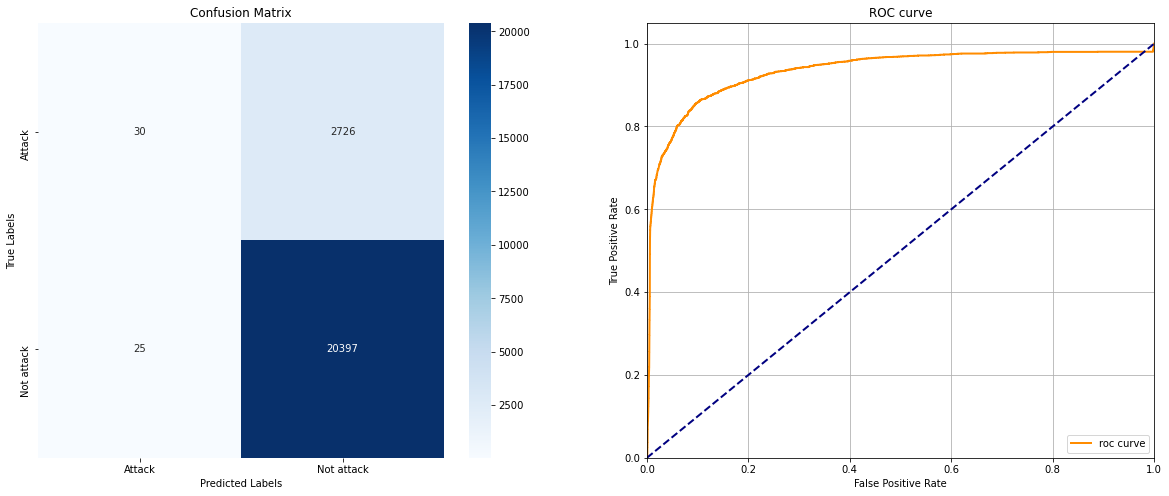

In [20]:
# test model on attack comments data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
prediction.metrics

{'eval_loss': 0.2784451805940399}

In [48]:
len(test_data2400_dataset)

2319

In [47]:
prediction_2400 = trainer.predict(test_data2400_dataset)

In [49]:
y_true_2400 = test_data2400_labels
y_prob_2400 = list(prediction_2400.predictions)

In [50]:
y_prob_final_2400 = []
y_pred_2400 = []
for i in range(len(y_prob_2400)):
    tempA = abs(y_prob_2400[i][0])
    tempB = abs(y_prob_2400[i][1])
    y_prob_final_2400.append(tempB/(tempA+tempB))
    if tempA > tempB:
        y_pred_2400.append(1)
    else:
        y_pred_2400.append(0)

Classification Report:
              precision    recall  f1-score   support

           1     0.2222    0.0088    0.0170       678
           0     0.7068    0.9872    0.8238      1641

    accuracy                         0.7012      2319
   macro avg     0.4645    0.4980    0.4204      2319
weighted avg     0.5651    0.7012    0.5879      2319



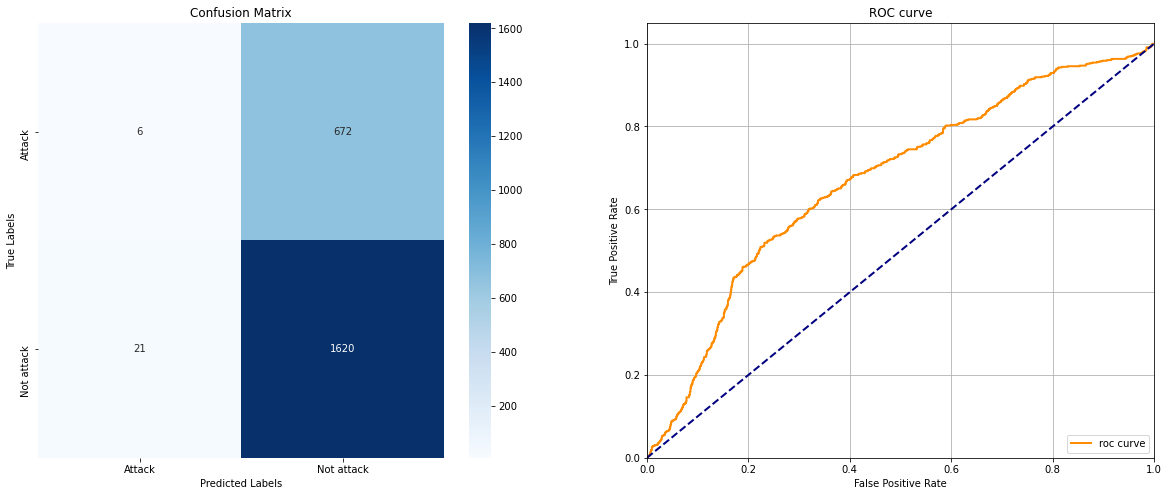

In [51]:
# 2400 hand labeled anti-asian data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
print('Classification Report:')
print(classification_report(y_true_2400, y_pred_2400, labels=[1,0], digits=4))

cm = confusion_matrix(y_true_2400, y_pred_2400, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm_2400, tpr_rt_lm_2400, _ = roc_curve(y_true_2400, y_prob_final_2400)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm_2400, tpr_rt_lm_2400, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()